# Titanic 생존자 예측
### 타이타닉 호 침몰 사건 당시의 사망자와 생존자를 구분하는 요인 분석을 통해, 승객들의 생존 여부를 예측

### 필요한 라이브러리 설치

In [4]:
# 데이터 불러오기
import pandas as pd
import numpy as np
import random as rnd

In [5]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# 머신러닝
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
import warnings
warnings.filterwarnings(action='ignore')

### 데이터 셋 불러오기
###### - train.csv : 모델 학습에 사용되는 데이터
###### - test.csv : 모델 적용 대상이 되는 데이터

In [8]:
train_df=pd.read_csv("titanic/train.csv")
test_df=pd.read_csv("titanic/test.csv")
# 모델 적용의 일관성을 위해,
# train과 test를 합한 combine 데이터 셋도 지정
combine=[train_df,test_df]

### 데이터 변수(Feature) 확인

In [9]:
# 변수 보기
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


##### 변수설명
PassengerId : 각 승객의 고유 번호

Survived : 생존 여부(종속 변수)
+ 0 = 사망
+ 1 = 생존

Pclass : 객실 등급 - 승객의 사회적, 경제적 지위
+ 1st = Upper
+ 2nd = Middle
+ 3rd = Lower

Name : 이름

Sex : 성별

Age : 나이

SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수

Parch : 동반한 Parent(부모) Child(자식)의 수

Ticket : 티켓의 고유넘버

Fare : 티켓의 요금

Cabin : 객실 번호

Embarked : 승선한 항
+ C = Cherbourg
+ Q = Queenstown
+ S = Southampton

In [10]:
# 데이터 미리 보기
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


예측의 대상인 object 변수(Label)은 "Survived", 나머지는 설명 변수로 작용됨

In [11]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
# 훈련 자료 정보
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# 테스트 자료 정보
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# 데이터 분석

In [14]:
# 훈련 자료 int, float 변수 통계치
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


+ 훈련 자료 샘플 수 : 891 (count=891)
+ 훈련 자료 샘플 내 생존율 : 38.4% (mean의 Survived=0.383838)

In [15]:
# 훈련 자료 object 변수 통계치
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


+ 훈련 자료 남성 수 : 577명 (top의 Sex = male, freq의 Sex = 577)
+ 훈련 자료 가장 많은 승선지 : S, 644명 (top의 Embarked = S, freq의 Emabarked =644)

### 훈련 자료에서 객실 등급(Pclass)에 따른 생존율 비교

In [16]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#groupby에 as_index를 False로 하면 Pclass를 index로 사용하지 않음
# ascending : 오름차순
# as_index를 True로 하면 Pclass를 index로 사용

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


+ 객실 등급이 좋을 수록 생존율이 높음

### 훈련 자료에서 성별(Sex)에 따른 생존율 비교

In [17]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


+ 여성의 생존율이 남성보다 높음

### 훈련 자료에서 함께 승선한 형제자매와 배우자 수(SibSp)에 따른 생존율 비교

In [18]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### 훈련 자료에서 함께 승선한 부모와 자식 수(Parch)에 따른 생존율 비교

In [19]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


동행이 적은 경우 , 생존률이 높음

### 훈련 자료에서 생존 여부(Survived)에 따른 연령(Age) 분포

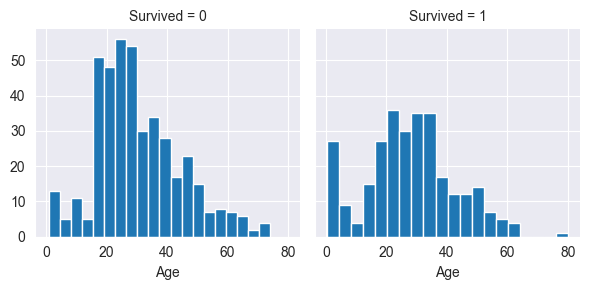

In [50]:
# 열 기준 생존 여부로 나눔
g_age=sns.FacetGrid(train_df, col='Survived')
# 히스토그램으로 시각화, 연령 분포
g_age.map(plt.hist, 'Age', bins=20)

survived=0: 생존하지 못한 승객들의 연령 분포
survived=1: 생존한 승객들의 연령 분포
-> 0세-5세, 20-40대 많이 생존.

### 훈련 자료에서 객실 등급(Pclass)과 생존 여부(Survived)에 따른 연령(Age) 분포

In [30]:
class_counts = train_df['Pclass'].value_counts() # value_counts() 수 구할 때
class_counts

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

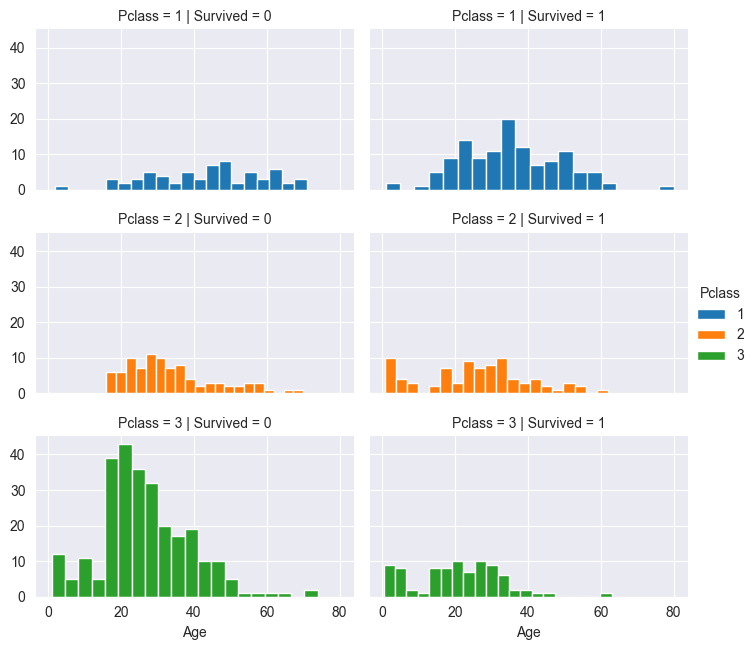

In [32]:
# 열을 생존 여부, row(열)와 hue(색)을 객실 등급으로 나눔. width = height * aspect
g_class = sns.FacetGrid(train_df, col='Survived', row='Pclass', hue='Pclass', height=2.2, aspect=1.6)
g_class.map(plt.hist, 'Age', bins=20)
# 범례
g_class.add_legend();

aspect
FacetGrid에서 서브플롯의 가로 길이와 세로 길이의 비율을 나타내는 인자
이 값이 1보다 작으면 세로 길이가 더 길어지고 1보다 크면 가로 길이가 더 길어진다.
aspect의 기본값은 1.6

hue
FacetGrid에서 서브플롯을 추가로 분할할 때, 추가 분할 기준이 되는 열의 이름을 지정하는 인자.
hue를 지정하면 분할된 서브플롯마다 hue에 따라 색상이 달라져, 분석 대상의 다른 측면을 시각화할 수 있다.

승객수 3:491 2:216 1:184
생존비율 3 < 2 < 1

### 훈련자료에서 승선지(Embarked)와 객실 등급(Pclass)에 따른 생존율(Survived)

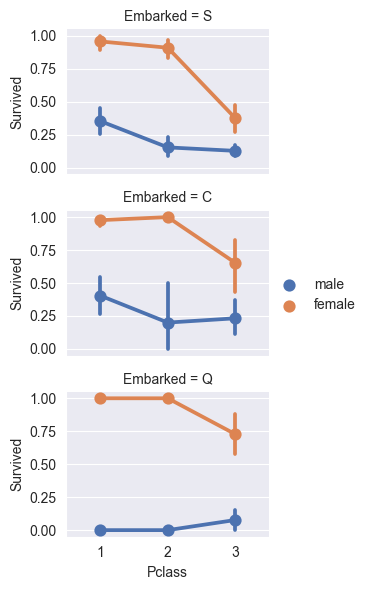

In [39]:
g_embakred = sns.FacetGrid(train_df, row='Embarked', height=2, aspect= 1.5)
g_embakred.map(sns.pointplot, 'Pclass', 'Survived','Sex', palette='deep',order=[1,2,3], hue_order=['male','female'])
g_embakred.add_legend()
# palette FacetGrid에서 색상을 지정
# order는 FacetGrid에서 서브플롯의 순서를 제어

q에서 승선한 남성은 거의 생존하지 못함.
남성 여성 생존 비율이 두드러지게 차이 나고 대체적으로 1등급칸에서 많이 생존.
q에서의 남성 승선률이 적을듯?

In [46]:
# q 항구에서 승선한 승객 중 남성의 비율 계산
q_male_boarding_rate = len(train_df[train_df['Sex'] == 'male']) / len(train_df)

# q 항구에서 승선한 남성 중 생존한 승객의 비율 계산
q_male_survival_rate = len(train_df[(train_df['Sex'] == 'male') & (train_df['Survived'] == 1)]) / len(train_df[train_df['Sex'] == 'male'])

# 전체 남성 중 p 항구에서 승선한 남성의 비율 계산
p_male_boarding_rate = len(train_df[(train_df['Embarked'] == 'P') & (train_df['Sex'] == 'male')]) / len(train_df[train_df['Sex'] == 'male'])

print("q 항구에서 승선한 승객 중 남성의 비율: {:.2%}".format(q_male_boarding_rate))
print("q 항구에서 승선한 남성 중 생존한 승객의 비율: {:.2%}".format(q_male_survival_rate))
print("전체 남성 중 p 항구에서 승선한 남성의 비율: {:.2%}".format(q_all_male_boarding_rate))

q 항구에서 승선한 승객 중 남성의 비율: 64.76%
q 항구에서 승선한 남성 중 생존한 승객의 비율: 18.89%
전체 남성 중 p 항구에서 승선한 남성의 비율: 0.00%


p항구에서 승선한 남성이 없나? 1클래스 한명 / 2클래스 두명 / 3클래스 몇십명 대부분 사망

어떤 항에서 승선했냐와 남성 생존률은 크게 관련 없는 것으로 보임.
단지 Q항에서의 남성 승선률이 낮았던것 같음.

### 훈련 자료에서 승선지(Embarked), 생존 여부(Survived), 성별(Sex)에 따른 요금(Fare)

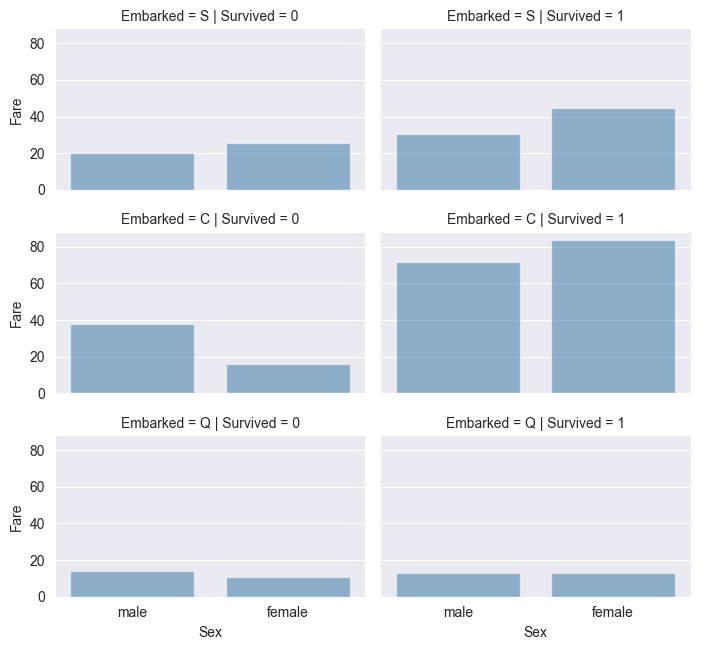

In [48]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)

# 바그래프로 시각화, x: 성별, y: 요금, Error bar: 표시 안 함
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None,order=["male","female"])

grid.add_legend()

### 데이터 전처리

In [62]:
# 변수 제거
print("current : ", train_df.shape, test_df.shape)

# 열 제거
train_df_c = train_df._drop_axis(['Ticket','Cabin','Name','PassengerId'], axis=1)
test_df_c = test_df._drop_axis(['Ticket','Cabin','Name','PassengerId'], axis=1)

print('after : ' , train_df_c.shape, test_df_c.shape)

current :  (891, 13) (418, 12)
after :  (891, 9) (418, 8)


In [63]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


female에서는 Miss와 Mrs가, male에서는 Master와 Mr가 두드러지게 나타남
Mlle,Ms == Miss
Ms는 == Mrs

In [66]:
# 나머지 other로 분류
dataset['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)